#Data Science Project – Student Performance Analysis


In [1]:
!pip install dabl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.0/567.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 43.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [2]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

In [3]:
#Reading the dataSet
data = pd.read_csv('https://thecleverprogrammer.com/wp-content/uploads/2020/05/StudentsPerformance.csv')

# getting the shape of the data
print(data.shape)

(1000, 8)


In [4]:
data.describe() #summary of data

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data.select_dtypes('object').nunique() #unique values in each column

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [6]:
#lets check the percentage of missing data in each columns present in the data :
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])


Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=8.04E-01'}, xlabel='reading score', ylabel='math score'>,
         <Axes: title={'center': 'F=7.78E-01'}, xlabel='writing score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=5.45E-02'}, xlabel='math score', ylabel='gender'>,
         <Axes: title={'center': 'F=4.29E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=8.68E-03'}, xlabel='math score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=8.53E-03'}, xlabel='math score', ylabel='lunch'>,
         <Axes: title={'center': 'F=0.00E+00'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

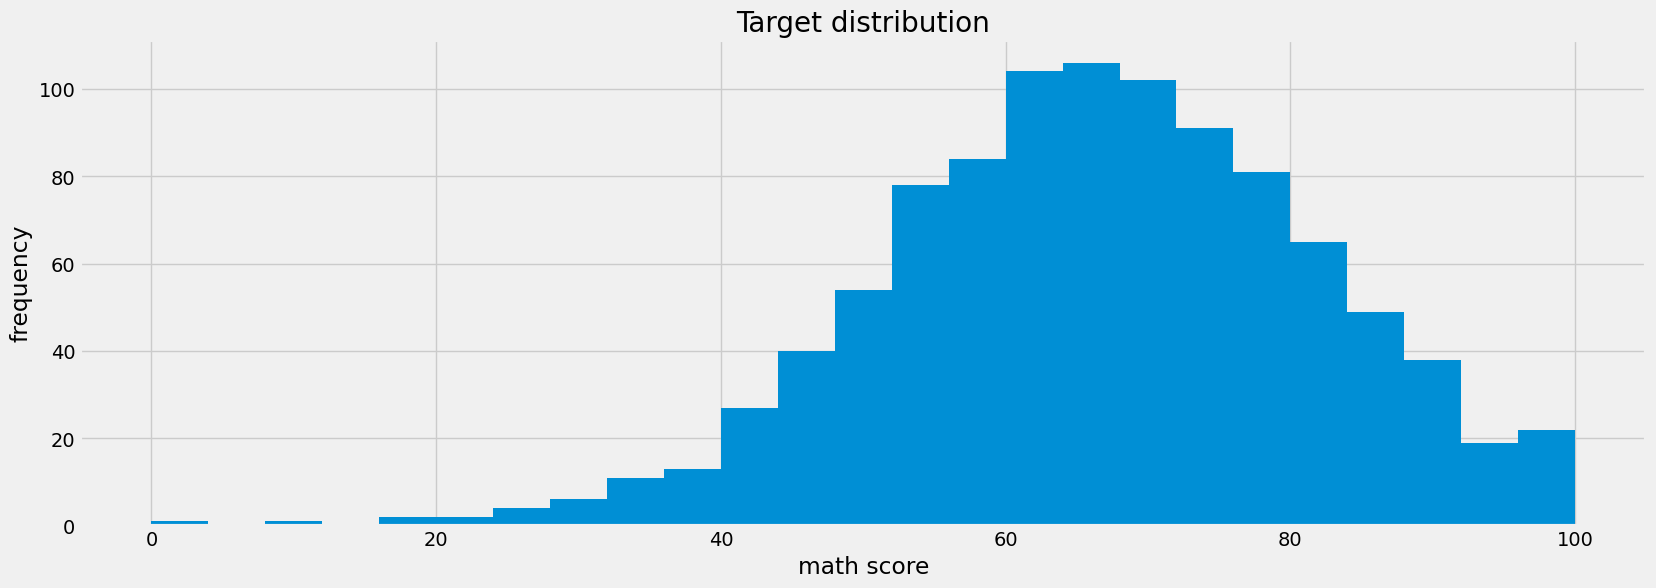

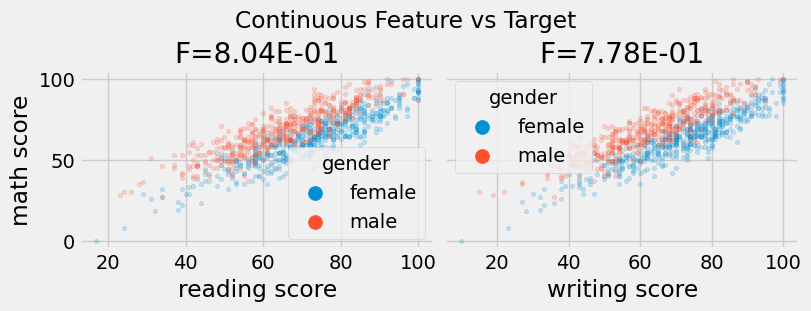

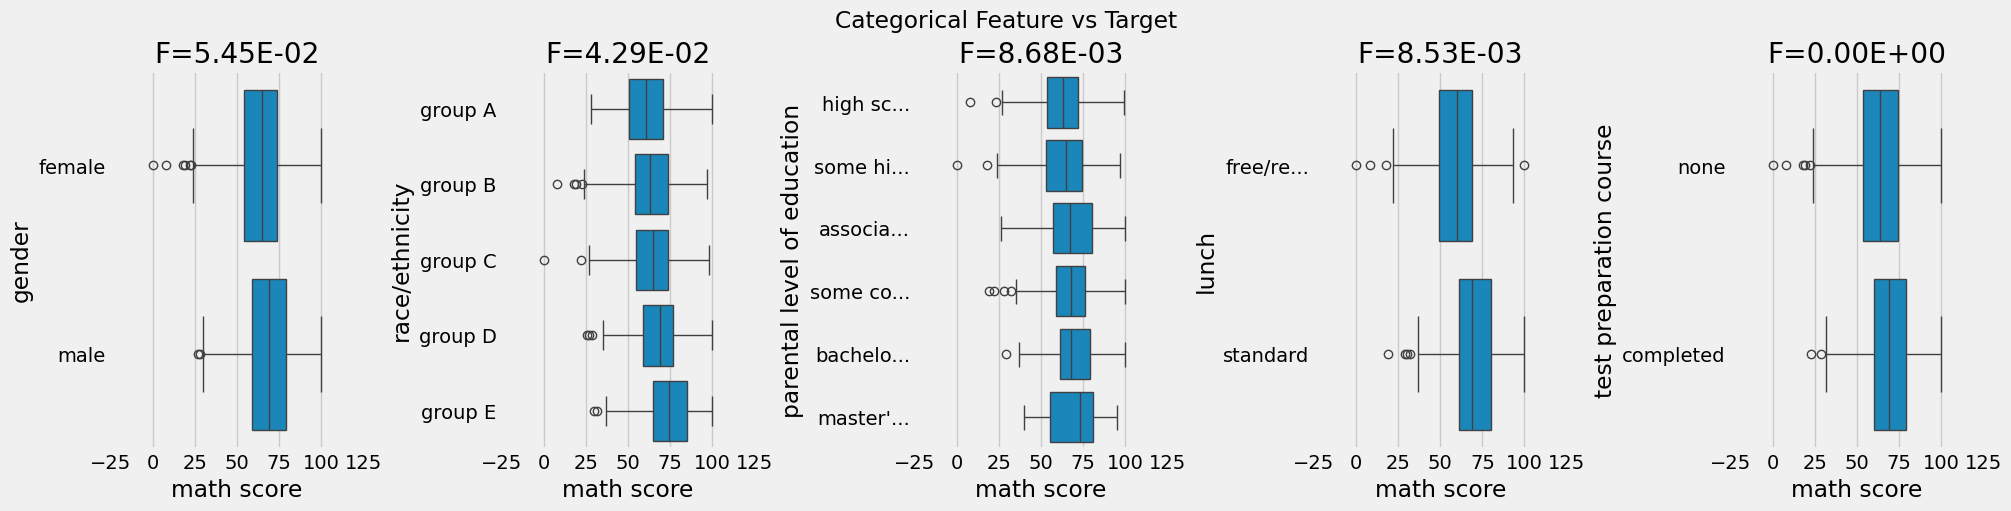

In [7]:
#To see comparison of all other attributes with respect to Math Marks
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
/usr/local/lib/python3.10/dist-packages/dabl/preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])


Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='reading score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.49E-01'}, xlabel='writing score', ylabel='reading score'>,
         <Axes: title={'center': 'F=8.04E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=4.37E-02'}, xlabel='reading score', ylabel='gender'>,
         <Axes: title={'center': 'F=2.84E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=2.48E-02'}, xlabel='reading score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=2.42E-02'}, xlabel='reading score', ylabel='lunch'>,
         <Axes: title={'center': 'F=9.11E-03'}, xlabel='reading score', ylabel='test preparation course'>]],
       dtype=object)]

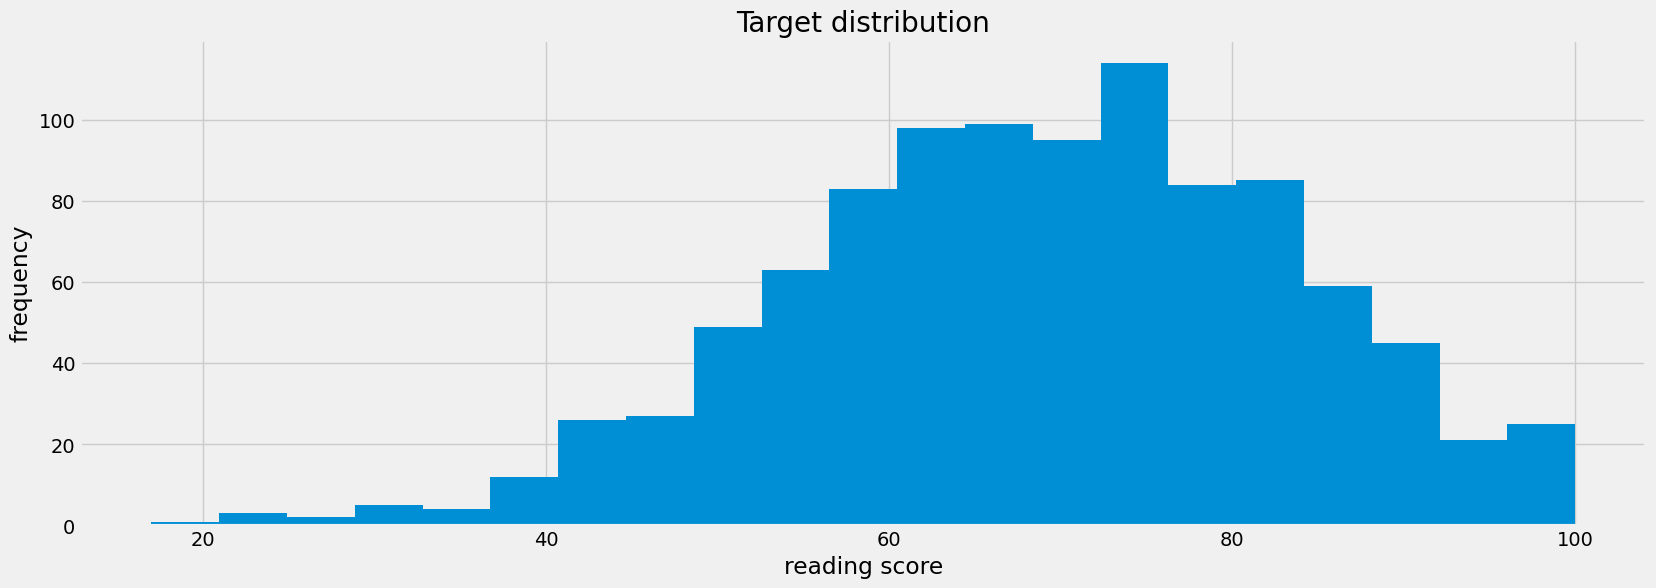

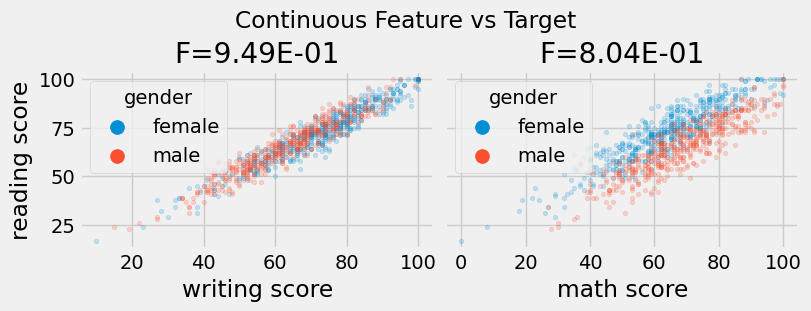

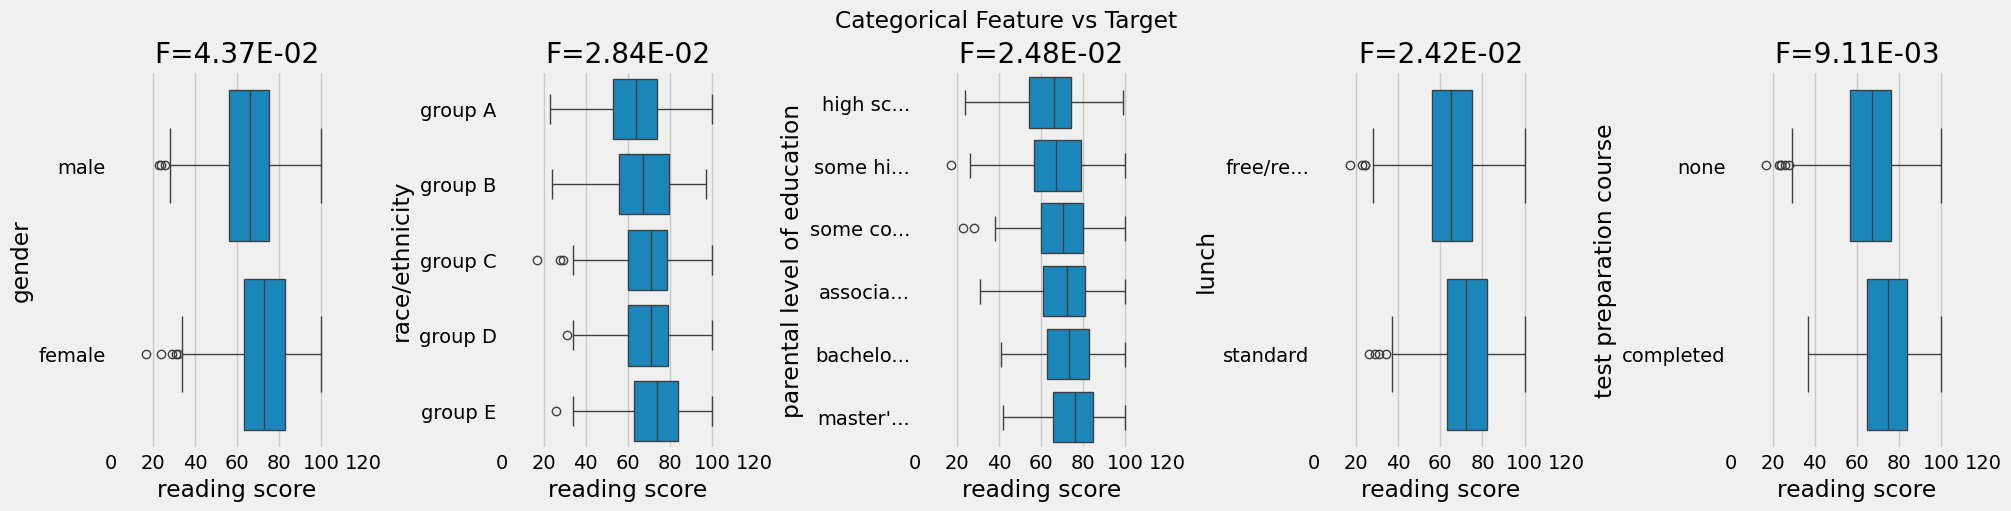

In [8]:
#Comparison of all other attributes with respect to Reading Marks :
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

In [9]:
#Lets check the Effect of Lunch on Student’s Performnce
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [10]:
#Lets check the Effect of Test Preparation Course on Scores
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

#Data Visualizations
##Visualizing the number of male and female in the data set

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<ipython-input-11-59d7317db5a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['gender'], palette = 'bone')


##Visualizing the different groups in the data set

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

##Visualizing the different parental education levels

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [ ]:
#Visualizing Maths score

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Computing the total score for each student

import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()


In [ ]:
#Computing percentage for each of the students
# importing math library to use ceil
from math import *
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

 Assigning grades to the grades according to the following criteria :

 0  - 40 marks : grade E

 41 - 60 marks : grade D

 60 - 70 marks : grade C

 70 - 80 marks : grade B

 80 - 90 marks : grade A

 90 - 100 marks : grade O

In [ ]:
# Add a 'status' column based on 'percentage'
passing_threshold = 40
data['status'] = data['percentage'].apply(lambda x: 'Pass' if x >= passing_threshold else 'Fail')

def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

#ML Modelling

In [ ]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# Verify the column names in your DataFrame
print(data.columns)



In [ ]:
# Add pass/fail columns
passing_threshold = 40  # Adjust this threshold as needed
data['pass_math'] = data['math score'].apply(lambda x: 'Pass' if x >= passing_threshold else 'Fail')
data['pass_reading'] = data['reading score'].apply(lambda x: 'Pass' if x >= passing_threshold else 'Fail')
data['pass_writing'] = data['writing score'].apply(lambda x: 'Pass' if x >= passing_threshold else 'Fail')

# Now you can apply label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['pass_math'] = le.fit_transform(data['pass_math'])
data['pass_reading'] = le.fit_transform(data['pass_reading'])
data['pass_writing'] = le.fit_transform(data['pass_writing'])
data['status'] = le.fit_transform(data['status'])

print(data.head()) # Check to see if the columns were added

#Data Preparation
Splitting the dependent and independent variables

In [ ]:
x = data.iloc[:,:14] # Independent variables
y = data.iloc[:,14]  # Dependent variable


print(x.shape)
print(y.shape)

In [ ]:
x.head()

In [ ]:
y.head()

In [ ]:
#Splitting the data set into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

#Modelling
Logistic Regression

In [ ]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# creating a scaler
mm = MinMaxScaler()
ohe = OneHotEncoder(handle_unknown='ignore') # Handle unknown categories during testing

# Select only numerical columns for scaling
numerical_cols = x_train.select_dtypes(include=['number']).columns
x_train_numerical = x_train[numerical_cols]
x_test_numerical = x_test[numerical_cols]

# feeding the independent variable into the scaler
x_train_scaled = mm.fit_transform(x_train_numerical)
x_test_scaled = mm.transform(x_test_numerical)

# Optionally, replace the original columns in x_train and x_test with the scaled data
x_train[numerical_cols] = x_train_scaled
x_test[numerical_cols] = x_test_scaled

# Select categorical columns for one-hot encoding
categorical_cols = x_train.select_dtypes(include=['object']).columns
x_train_categorical = x_train[categorical_cols]
x_test_categorical = x_test[categorical_cols]

# Fit OneHotEncoder on training data and transform both training and testing data
x_train_ohe = ohe.fit_transform(x_train_categorical).toarray()
x_test_ohe = ohe.transform(x_test_categorical).toarray()

# Combine numerical and one-hot encoded categorical features
x_train_final = np.concatenate((x_train_scaled, x_train_ohe), axis=1)
x_test_final = np.concatenate((x_test_scaled, x_test_ohe), axis=1)

# Now use x_train_final and x_test_final for model training
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train_final, y_train)

# predicting the test set results
y_pred = model.predict(x_test_final)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train_final, y_train))
print("Testing Accuracy :", model.score(x_test_final, y_test))

#Random Forest


In [ ]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# creating a scaler
mm = MinMaxScaler()
ohe = OneHotEncoder(handle_unknown='ignore') # Handle unknown categories during testing

# Select only numerical columns for scaling
numerical_cols = x_train.select_dtypes(include=['number']).columns
x_train_numerical = x_train[numerical_cols]
x_test_numerical = x_test[numerical_cols]

# feeding the independent variable into the scaler
x_train_scaled = mm.fit_transform(x_train_numerical)
x_test_scaled = mm.transform(x_test_numerical)

# DO NOT replace original columns, create new dataframes instead
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=numerical_cols, index=x_train.index)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=numerical_cols, index=x_test.index)

# Select categorical columns for one-hot encoding
categorical_cols = x_train.select_dtypes(include=['object']).columns
x_train_categorical = x_train[categorical_cols]
x_test_categorical = x_test[categorical_cols]

# Fit OneHotEncoder on training data and transform both training and testing data
x_train_ohe = ohe.fit_transform(x_train_categorical).toarray()
x_test_ohe = ohe.transform(x_test_categorical).toarray()

# Get feature names for one-hot encoded columns
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

# Create DataFrames for one-hot encoded data
x_train_ohe_df = pd.DataFrame(x_train_ohe, columns=ohe_feature_names, index=x_train.index)
x_test_ohe_df = pd.DataFrame(x_test_ohe, columns=ohe_feature_names, index=x_test.index)

# Combine numerical and one-hot encoded categorical features
x_train_final = pd.concat([x_train_scaled_df, x_train_ohe_df], axis=1)
x_test_final = pd.concat([x_test_scaled_df, x_test_ohe_df], axis=1)

# Now use x_train_final and x_test_final for model training
from sklearn.linear_model import  LogisticRegression

# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(x_train_final, y_train)

# predicting the test set results
y_pred = model.predict(x_test_final)

# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train_final, y_train))
print("Testing Accuracy :", model.score(x_test_final, y_test))

# Now train the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# creating a model
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(x_train_final, y_train) # Use the processed data

# predicting the x-test results
y_pred = model.predict(x_test_final) # Use the processed data

# calculating the accuracies
print("Training Accuracy :", model.score(x_train_final, y_train))
print("Testing Accuracy :", model.score(x_test_final, y_test))